In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame
# %matplotlib notebook
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#TEST USING QUANTILE REGRESSION ON EB/EE DATA SEPARATELY AND UNIFIED AFTERWARDS, WITH AND WITHOUT WEIGHTS
#---------------------------------------------------------------------


In [3]:
# Variable you want to correct
ylist = ["R9"]#, "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi", "SigmaRR", 'CovarianceIetaIphi', 'PhoIso03', 'ChIso03', 'ChIso03worst']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [4]:
#NB: we have already corrected mc and data,ie weighted wrt to the PU
# Upload Dataframes:
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")
qr_mc1.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Tot.h5", 0, -1)
qr_mc2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Tot.h5", 0, -1)
#-------------------------------------------------------------
qr_data = quantileRegression("data")


qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Tot.h5", 0, -1)
dfdata=qr_data.getDF()

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Tot.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Tot.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Tot.h5
Selecting events   [ 0 ,  2999893 ]  out of  2999893
number of events: 2999893


In [5]:
#Assign weighted runperiod to MC
vecPeriod=np.array([len(dfdata.query("runperiod==1").index),
          len(dfdata.query("runperiod==2").index),
          len(dfdata.query("runperiod==3").index),
          len(dfdata.query("runperiod==4").index),
          len(dfdata.query("runperiod==5").index)])
print vecPeriod
vecPeriod=vecPeriod/float(vecPeriod.sum())
print vecPeriod
period=np.array([0,
                 vecPeriod[0],
                 vecPeriod[0]+vecPeriod[1],
                 vecPeriod[0]+vecPeriod[1]+vecPeriod[2],
                 vecPeriod[0]+vecPeriod[1]+vecPeriod[2]+vecPeriod[3],
                 vecPeriod[0]+vecPeriod[1]+vecPeriod[2]+vecPeriod[3]+vecPeriod[4]+0.1])
print period
qr_mc1.df["runperiod"]=np.digitize(np.random.rand(len(qr_mc1.df.index)),period)
qr_mc2.df["runperiod"]=np.digitize(np.random.rand(len(qr_mc2.df.index)),period)

[1057588  354420  226402  623716  737767]
[ 0.35254191  0.11814421  0.07547003  0.20791275  0.2459311 ]
[ 0.          0.35254191  0.47068612  0.54615615  0.7540689   1.1       ]


In [6]:
qr_mc1.correctAllTime(X, ylist, quantiles,EBEE="EB", relativePath= "weights_Period") 
qr_mc2.correctAllTime(X, ylist, quantiles,EBEE="EE", relativePath= "weights_Period") 
dfmc1= qr_mc1.getDF() 
dfmc2= qr_mc2.getDF() 
frame2 = [dfmc1, dfmc2] 
data2 = pd.concat(frame2) 
dfmc = data2.reset_index() 

Corrected variables file (e.g.  correctedTargetsPeriod1weights_Period_EB.h5  ) does not exists. This will take a while...
Correct EB :
-1.4442  <  ScEta  and  ScEta  <  1.4442
Loading mc weights for  R9  : 
    ./weights/weights_Period_1/mc_weights_EB
Loading data weights for  R9
    ./weights/weights_Period_Tot/data_weights_EB
Get corrections for  R9  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  R9 for mc
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho', 'runperiod']  target y =  R9 for data
Writing correctedTargets_ EB .h5
Corrected variables file (e.g.  correctedTargetsPeriod2weights_Period_EB.h5  ) does not exists. This will take a while...
Correct EB :
-1.4442  <  ScEta  and  ScEta  <  1.4442
Loading mc weights for  R9  : 
    ./weights/weights_Period_2/mc_weights_EB
Loading data weights for  R9
    ./weights/weights_Period_Tot/data_weights_EB
Get corrections for  R9  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.

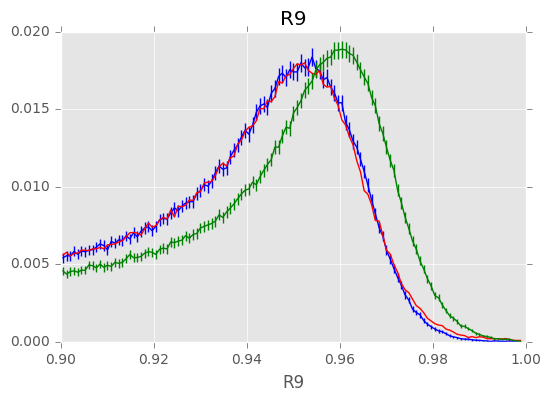

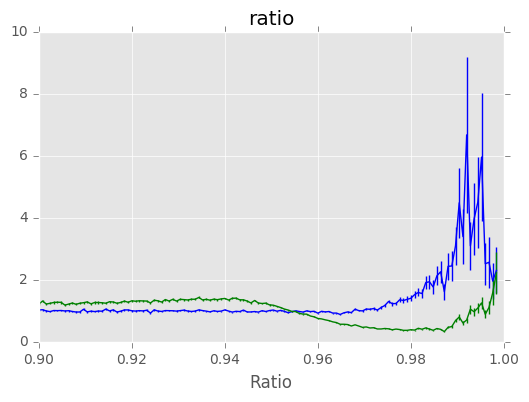

In [7]:
rv2 = np.arange(0.9,1.0,0.0008)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("R9")
  
plot.plotHistErr(dfmc["R9_corr"], rv2,Weight=dfmc["weight"], Color="b")
plot.plotHistErr(dfdata["R9"], rv2, Color="r", Weight=dfdata["weight"])
plot.plotHistErr(dfmc["R9"], rv2,Weight=dfmc["weight"], Color="g")  

ax.set_title('R9')

rv=np.arange(0,40,0.5)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Ratio")
    
plot.plotHistRatio(dfdata["R9"],dfmc["R9_corr"], rv2,Weight1=dfdata["weight"],Weight2=dfmc["weight"], Color="b")
plot.plotHistRatio(dfdata["R9"],dfmc["R9"], rv2,Weight1=dfdata["weight"],Weight2=dfmc["weight"], Color="g")

ax.set_title('ratio')

plotting  R9


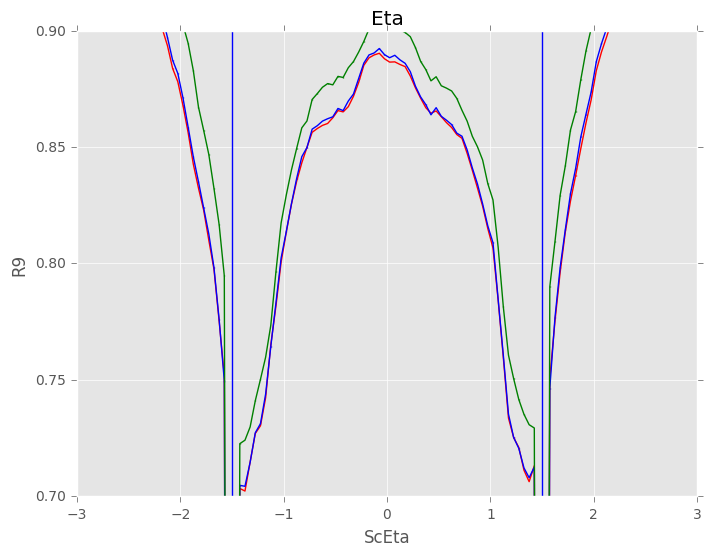

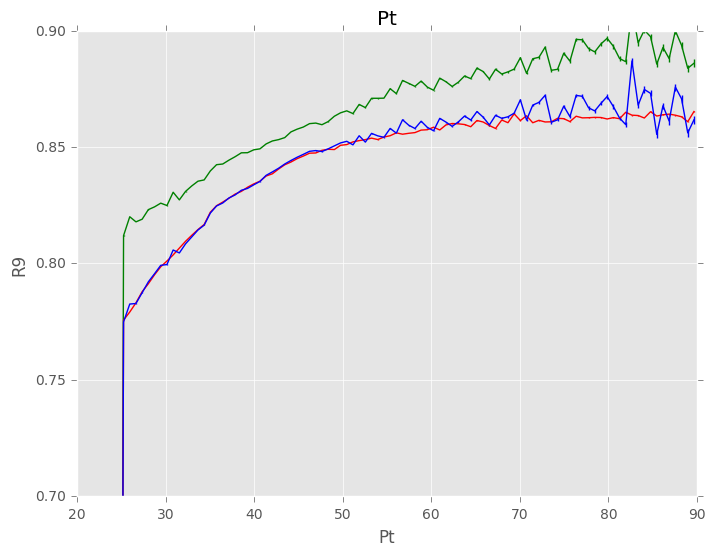

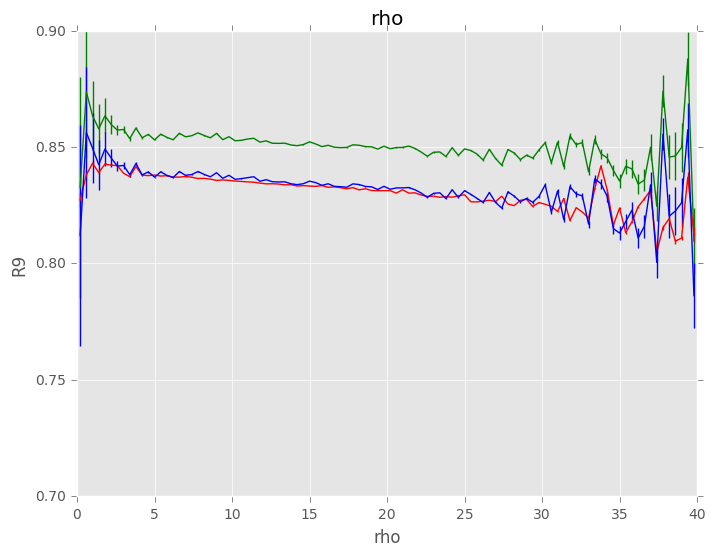

In [7]:
for yvar in ["R9"]:#, "S4", "SigmaIeIe", "EtaWidth"]:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar

    if yvar == "R9":
        minEB, maxEB = 0.7, 0.9
        minEE, maxEE = 0.7, 0.9
    

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('ScEta')
    ax.set_ylabel(yvar)
    
    
    ax.axvline(x=1.5)
    ax.axvline(x=-1.5)
    
    
    
    plot.Profile(dfdata['ScEta'], dfdata[yvar]      ,100,-2.5,2.5,ax, 'red',dfdata["weight"])
    plot.Profile(dfmc['ScEta']  , dfmc[yvar+'_corr'],100,-2.5,2.5,ax, 'blue',dfmc['weight'])
    plot.Profile(dfmc['ScEta']  , dfmc[yvar]        ,100,-2.5,2.5,ax,'green',dfmc['weight'])
    ax.set_title('Eta')   
#---------------------------------------------------------------------------------------------------------
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('Pt')
    ax.set_ylabel(yvar)
    

    
    plot.Profile(dfmc['Pt']  , dfmc[yvar]        ,100,20.,90.,ax, 'green',dfmc["weight"])
    plot.Profile(dfdata['Pt'], dfdata[yvar]      ,100,20.,90.,ax, 'red',dfdata["weight"])
    plot.Profile(dfmc['Pt']  , dfmc[yvar+'_corr'],100,20.,90.,ax, 'blue',dfmc["weight"])
    ax.set_title('Pt') 
#---------------------------------------------------------------------------------------------------------
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('rho')
    ax.set_ylabel(yvar)
    
   
    
    plot.Profile(dfmc['rho']  , dfmc[yvar]        ,100,0.,40.,ax, 'green',dfmc["weight"])
    plot.Profile(dfdata['rho'], dfdata[yvar]      ,100,0.,40.,ax, 'red',dfdata["weight"])
    plot.Profile(dfmc['rho']  , dfmc[yvar+'_corr'],100,0.,40.,ax, 'blue',dfmc["weight"])
    ax.set_title('rho') 
